/Users/yge/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yge/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yge/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yge/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

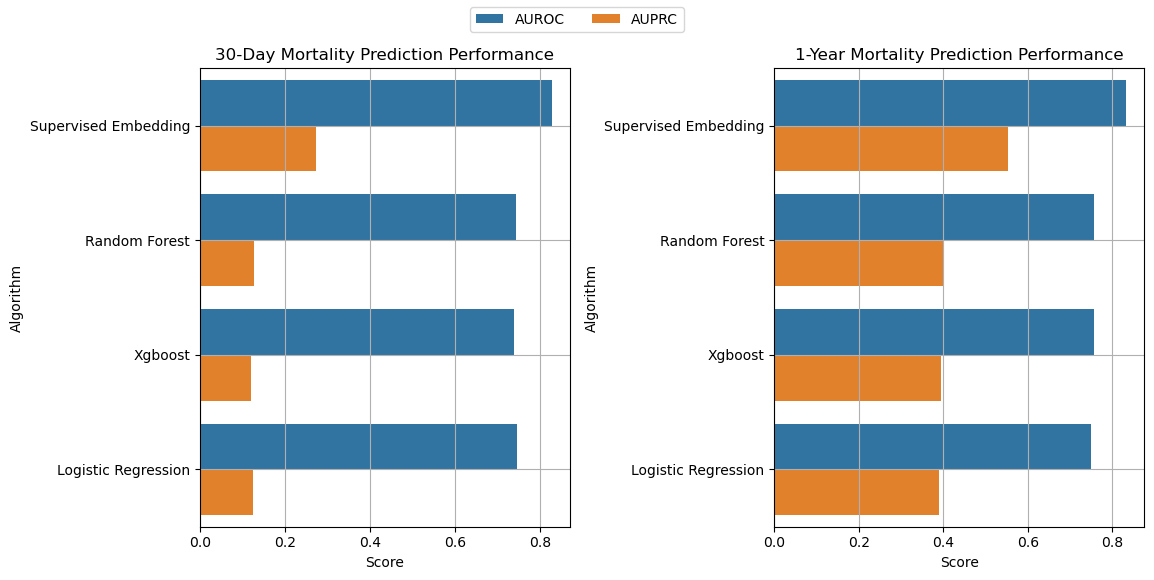

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def baseline_comparison():

    # Data for 30-day mortality
    data_30_day = pd.DataFrame({
        'Algorithm': ['Supervised Embedding', 'Random Forest', 'Xgboost', 'Logistic Regression']*2,
        'Score': [0.8283, 0.7445, 0.7399, 0.7470, 0.2724, 0.1276, 0.1199, 0.1246],
        'Metric': ['AUROC']*4 + ['AUPRC']*4
    })

    # Data for 1-year mortality
    data_1_year = pd.DataFrame({
        'Algorithm': ['Supervised Embedding', 'Random Forest', 'Xgboost', 'Logistic Regression']*2,
        'Score': [0.8330, 0.7573, 0.7568, 0.7499, 0.5535, 0.4012, 0.3946, 0.3907],
        'Metric': ['AUROC']*4 + ['AUPRC']*4
    })

    # Initialize the matplotlib figure
    f, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 30-day mortality
    sns.barplot(x='Score', y='Algorithm', hue='Metric', data=data_30_day, ax=axes[0])
    axes[0].set_title('30-Day Mortality Prediction Performance')
    axes[0].grid(True)

    # Plot for 1-year mortality
    sns.barplot(x='Score', y='Algorithm', hue='Metric', data=data_1_year, ax=axes[1])
    axes[1].set_title('1-Year Mortality Prediction Performance')
    axes[1].grid(True)

    # Improve the legend
    handles, labels = axes[0].get_legend_handles_labels()
    f.legend(handles, labels, loc='upper center', ncol=2)

    # Remove the legends for subplots as we have a centralized legend now
    axes[0].get_legend().remove()
    axes[1].get_legend().remove()


    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.savefig('/plots/comparison.png')
    

def plot_auroc(train_auroc, val_auroc):

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(train_auroc) + 1)

    plt.plot(epochs, train_auroc, label='Training AUROC', marker='o')
    plt.plot(epochs, val_auroc, label='Validation AUROC', marker='o')
    plt.title('Training and Validation AUROC')
    plt.xlabel('Epochs')
    plt.ylabel('AUROC')
    plt.legend()
    plt.tight_layout()
    plt.show()



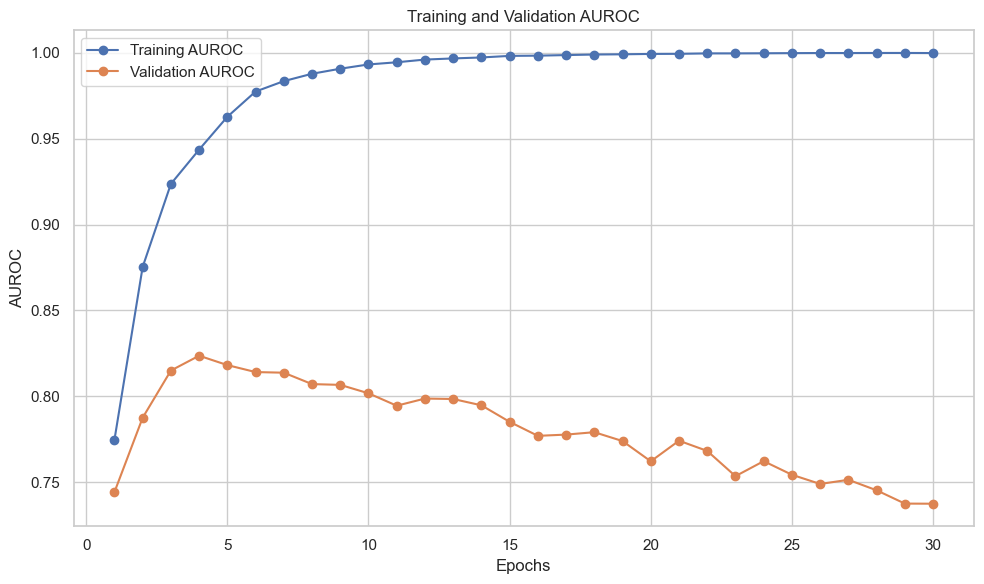

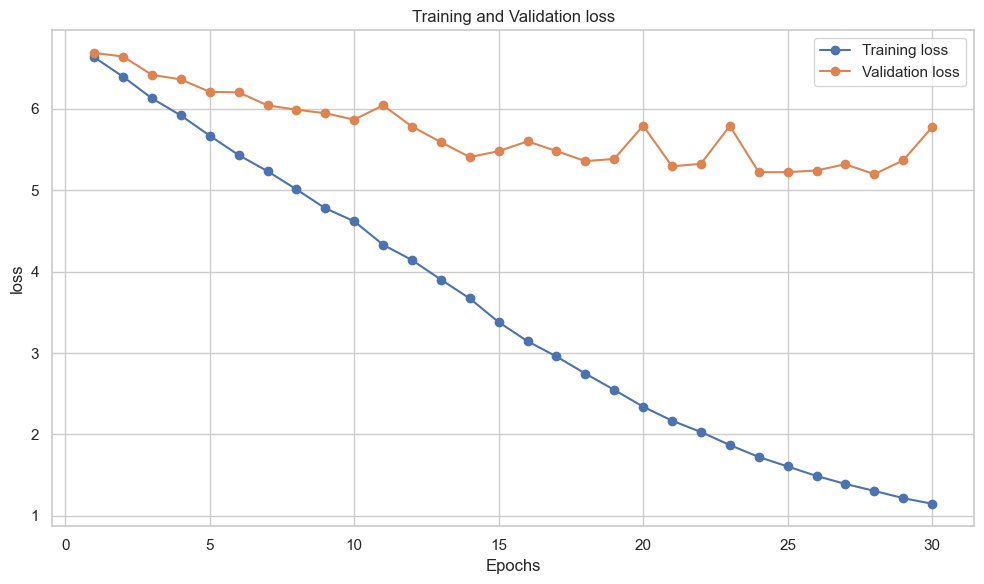

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_loss(train_loss, val_loss):
    """
    Plot the training and validation AUROC curves.

    Parameters:
    train_auroc (list): A list of AUROC scores for the training set.
    val_auroc (list): A list of AUROC scores for the validation set.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, label='Training loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation loss', marker='o')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

train_loss = [6.632587194442749, 6.393828040903265, 6.127792562137951, 5.9178823861208825, 5.669448137283325, 5.431282776052302, 5.233179759979248, 5.010475332086736, 4.777406055277044, 4.618061674724926, 4.329898428916931, 4.141580986976623, 3.9019190159710972, 3.670012658292597, 3.3794630267403343, 3.1447227640585464, 2.957546457377347, 2.7473029602657664, 2.547330723025582, 2.340512273528359, 2.1692127682945945, 2.0299123915759, 1.8701373132792387, 1.7234255866570907, 1.6067699389024215, 1.4902777742255817, 1.392189587246288, 1.3068383455276489, 1.2177076561884446, 1.1494093266400425]
val_loss = [6.685440971005347, 6.641490290241856, 6.416358978517594, 6.3606478014299945, 6.207300939867573, 6.202148452881844, 6.04104931123795, 5.9883913224743255, 5.945218501552459, 5.866429805755615, 6.041670845400903, 5.781750771307176, 5.590593830231698, 5.406330870043847, 5.479493218083536, 5.599554046507804, 5.480952939679546, 5.356586364007765, 5.384105905409782, 5.792472947028376, 5.292824983596802, 5.323756817848452, 5.790228859070809, 5.220721790867467, 5.2218572478140555, 5.241504769171438, 5.318755988151796, 5.195893510695426, 5.366365186629757, 5.773812155569753]
train_roc = [0.7745753410824276, 0.8753042992716683, 0.9236327384689025, 0.9436046473349472, 0.9627156366999284, 0.9774222338127663, 0.9834836200801882, 0.9877745409536803, 0.9907116971419643, 0.9932007485496417, 0.9944527124306521, 0.996036896231329, 0.996700659519851, 0.9972656859322484, 0.9981778076862463, 0.9983104137938374, 0.9986503158870336, 0.9989735223380417, 0.9991033519679123, 0.9993209900550347, 0.9993856757318395, 0.999642096806988, 0.9996413004651928, 0.9997037313489272, 0.9997885725254062, 0.9998443663896005, 0.9998424626835093, 0.9998791752082339, 0.9998917313053036, 0.9998313701849445]
val_roc = [0.7441477469998489, 0.7874929851915079, 0.814953784674554, 0.8236008090199152, 0.8181379000958545, 0.8140758465645745, 0.8137126917487465, 0.8070705511192467, 0.8066241948419752, 0.8017166343594789, 0.7944942863704402, 0.7986538596286052, 0.7983960620897185, 0.7947218574367817, 0.7850984056803462, 0.7769429854773736, 0.77766618894865, 0.7790705201964204, 0.7739040530142912, 0.7621155429312308, 0.774112959293731, 0.768152668938778, 0.7534693559592438, 0.7622085108398682, 0.7542793013229664, 0.7489249775187389, 0.7513449796420849, 0.7452397897395693, 0.737494373095904, 0.7374255103476312]

plot_auroc(train_roc, val_roc)
plot_loss(train_loss, val_loss)
